In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize


# Load Data

In [81]:
data = pd.read_csv('E-commerce Customer Behavior.csv')

In [82]:
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


#  Explore the data

C:\Users\farha\AppData\Local\Temp\ipykernel_13492\2538622133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = i, palette='Spectral')


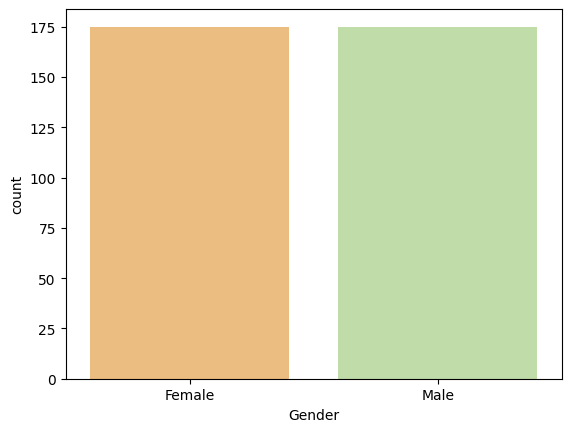

C:\Users\farha\AppData\Local\Temp\ipykernel_13492\2538622133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = i, palette='Spectral')


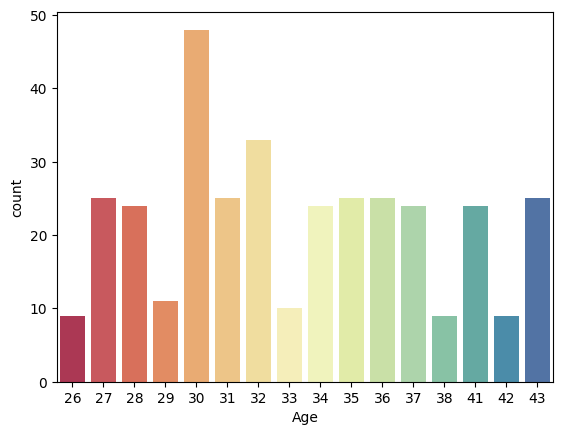

C:\Users\farha\AppData\Local\Temp\ipykernel_13492\2538622133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = i, palette='Spectral')


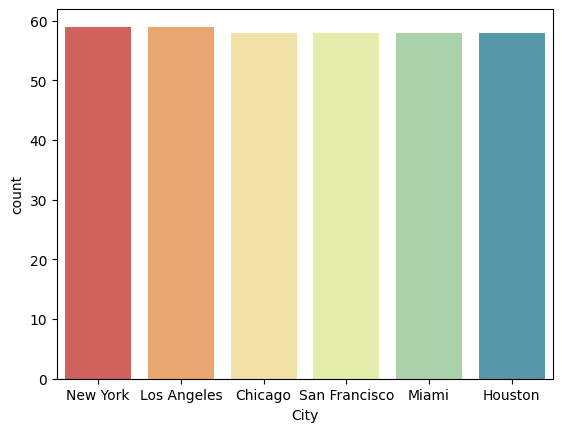

C:\Users\farha\AppData\Local\Temp\ipykernel_13492\2538622133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = i, palette='Spectral')


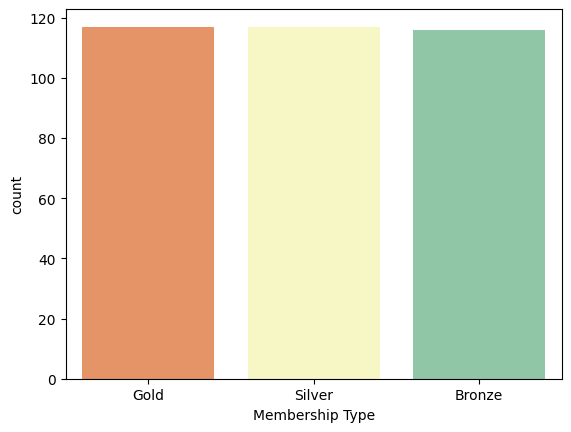

C:\Users\farha\AppData\Local\Temp\ipykernel_13492\2538622133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = i, palette='Spectral')


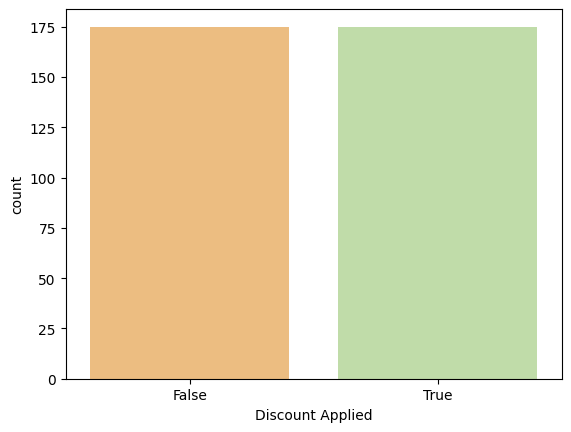

C:\Users\farha\AppData\Local\Temp\ipykernel_13492\2538622133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x = i, palette='Spectral')


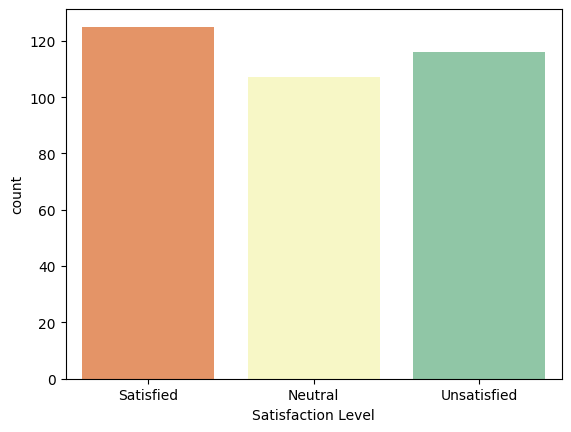

In [83]:
for i in ['Gender', 'Age', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level']:
    sns.countplot(data=data, x = i, palette='Spectral')
    plt.show()

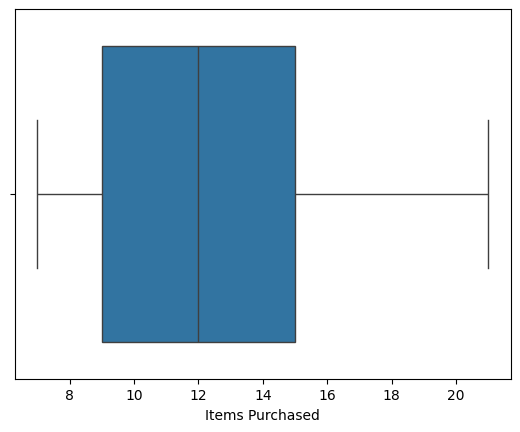

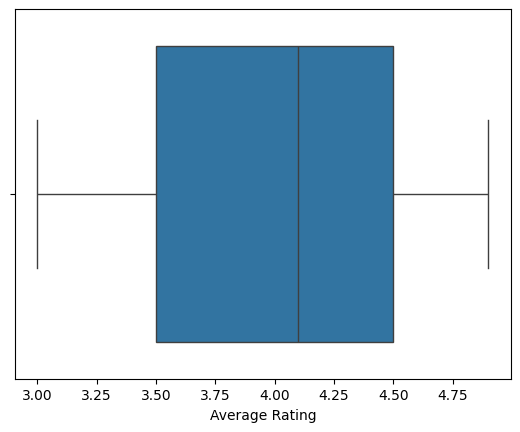

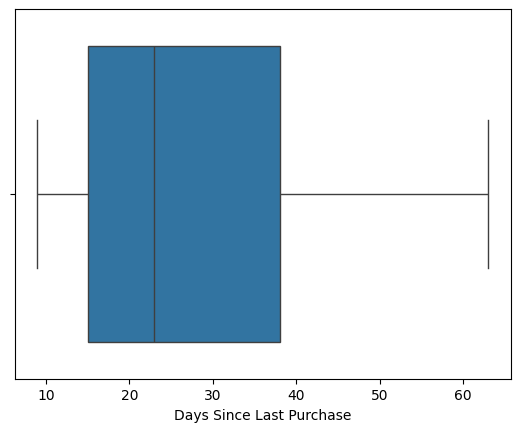

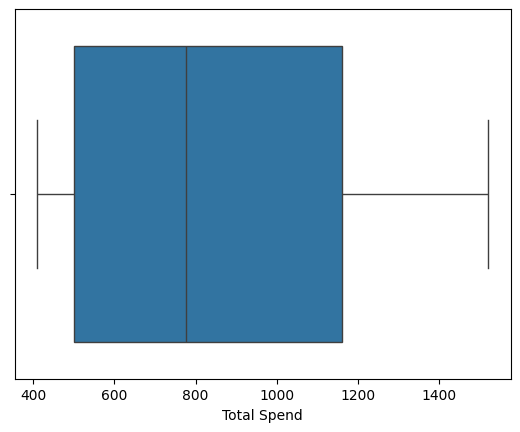

In [84]:
for i in ["Items Purchased","Average Rating", "Days Since Last Purchase", "Total Spend"]:
    sns.boxplot(data=data,
                x = i,)
    plt.show()

# Pre processing

kita memelih 3 column yaitu Age, Total Spend, dan Items Purchased.

In [85]:
train = data[['Age', 'Total Spend', 'Items Purchased']].copy()

In [86]:
train.isnull().sum()

Age                0
Total Spend        0
Items Purchased    0
dtype: int64

In [87]:
train.drop_duplicates(inplace=True)

# Make model

<Axes: xlabel='Total Spend', ylabel='Items Purchased'>

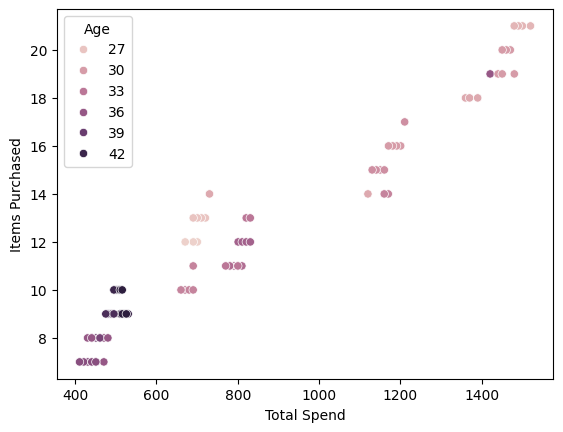

In [88]:
sns.scatterplot(data=train, x = 'Total Spend', y = 'Items Purchased' , hue='Age')

In [89]:
normalized_data = preprocessing.normalize(train[['Total Spend', 'Items Purchased', 'Age']])

0.7515139556615114


c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Total Spend', ylabel='Items Purchased'>

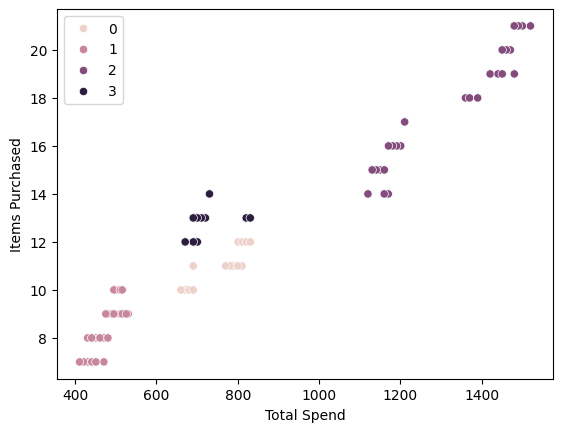

In [90]:
kmeans  = KMeans(n_clusters= 4)
kmeans.fit(normalized_data)
print(silhouette_score(normalized_data, kmeans.labels_, metric='euclidean'))
sns.scatterplot(data=train[['Total Spend', 'Items Purchased']], x = 'Total Spend', y = 'Items Purchased',
                hue=kmeans.labels_)

In [91]:

def make_model(n_clus = 3):
    normalized_data = normalize(train[['Total Spend', 'Items Purchased', 'Age']])

    # Perform K-means clustering
    n_clusters = n_clus
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(normalized_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(normalized_data, kmeans.labels_, metric='euclidean')

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the data points
    scatter = ax.scatter(normalized_data[:, 0], normalized_data[:, 1], normalized_data[:, 2], 
                        c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

    # Plot the cluster centers
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
            c='red', s=200, alpha=0.9, marker='x')

    # Set labels and title
    ax.set_xlabel('Normalized Total Spend')
    ax.set_ylabel('Normalized Items Purchased')
    ax.set_zlabel('Normalized Age')
    ax.set_title(f'3D Visualization of K-means Clustering on Normalized Data with {n_clus} cluster')

    # Add a color bar
    plt.colorbar(scatter, label='Cluster Label', pad=0.1)

    # Add silhouette score information
    plt.figtext(0.02, 0.02, f'Silhouette Score: {silhouette_avg:.3f}', 
                fontsize=10, ha='left')

    # Show the plot
    plt.tight_layout()
    plt.show()

c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


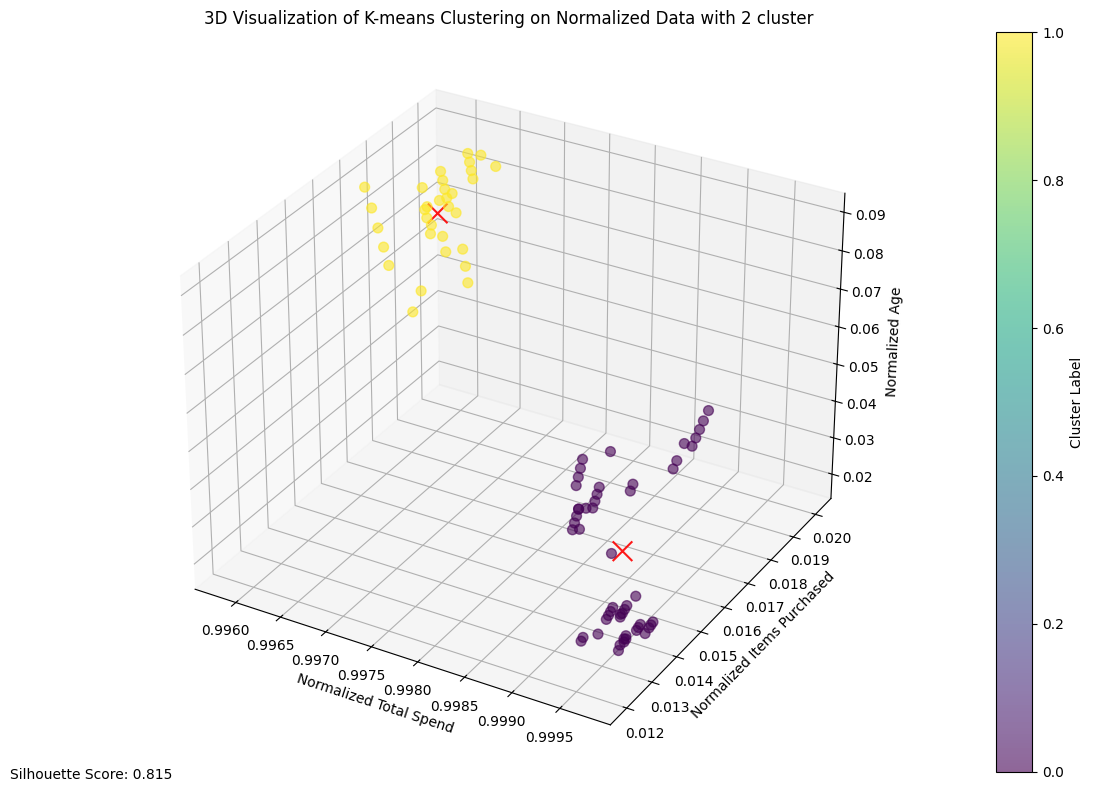

c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


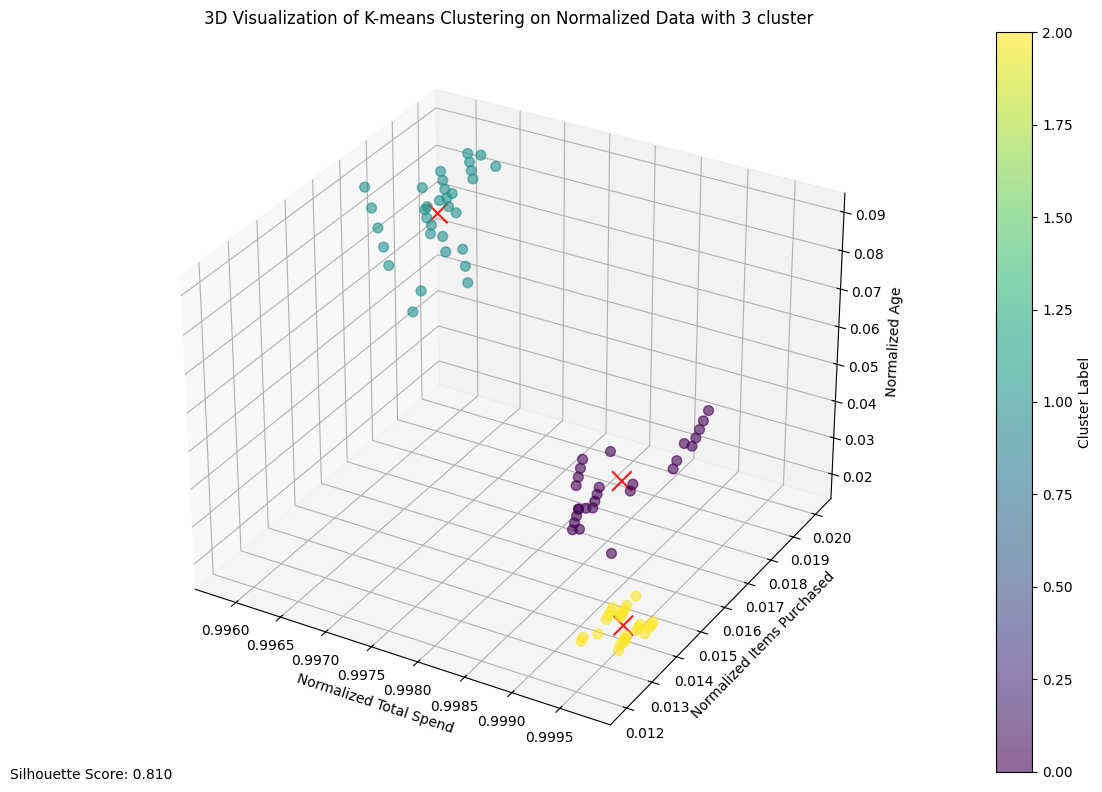

c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


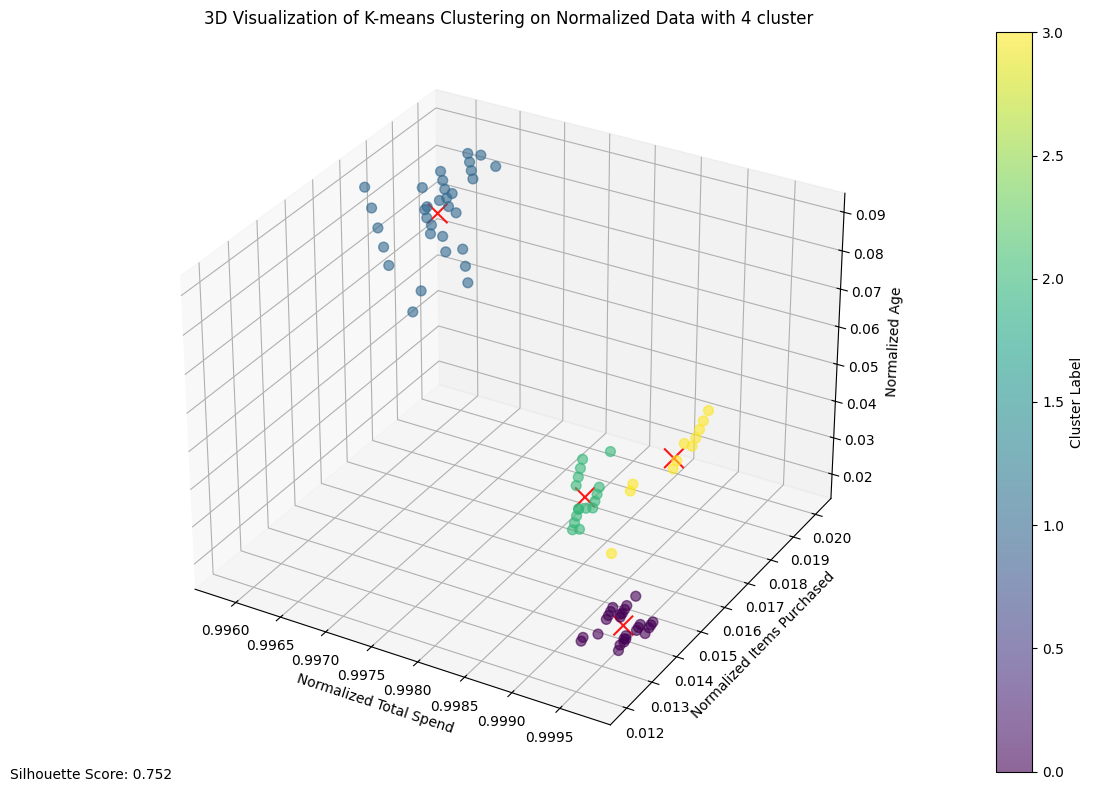

c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


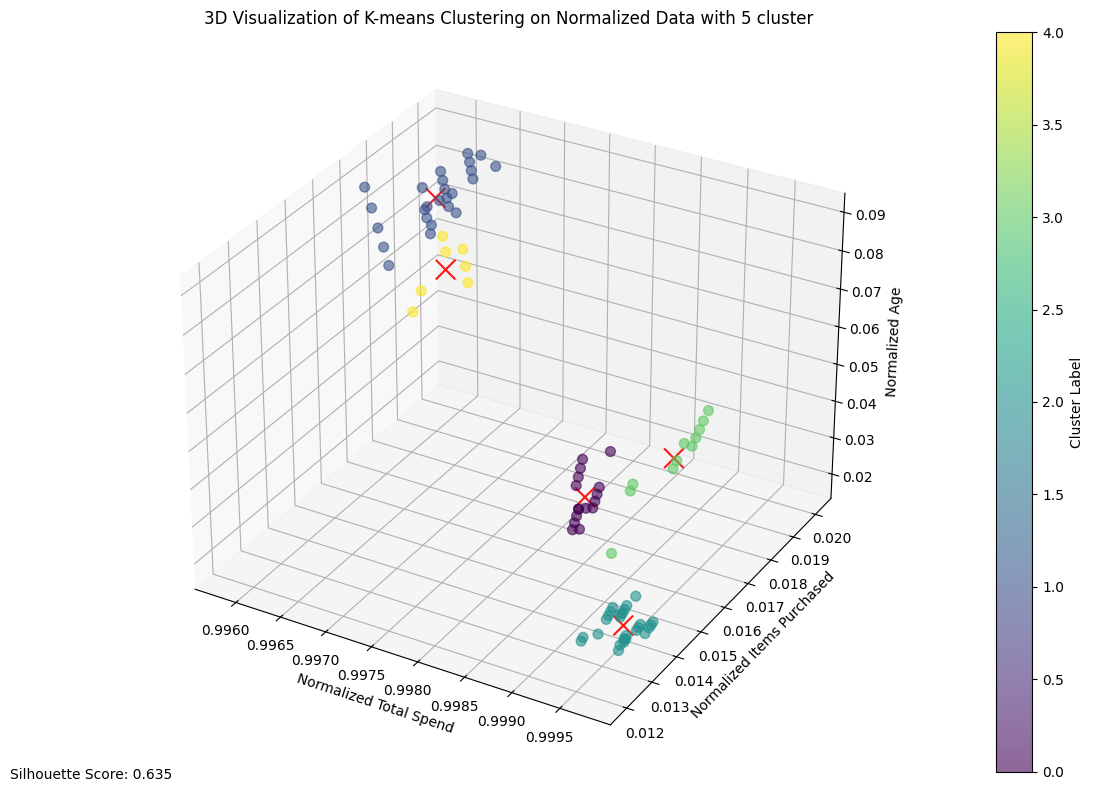

c:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


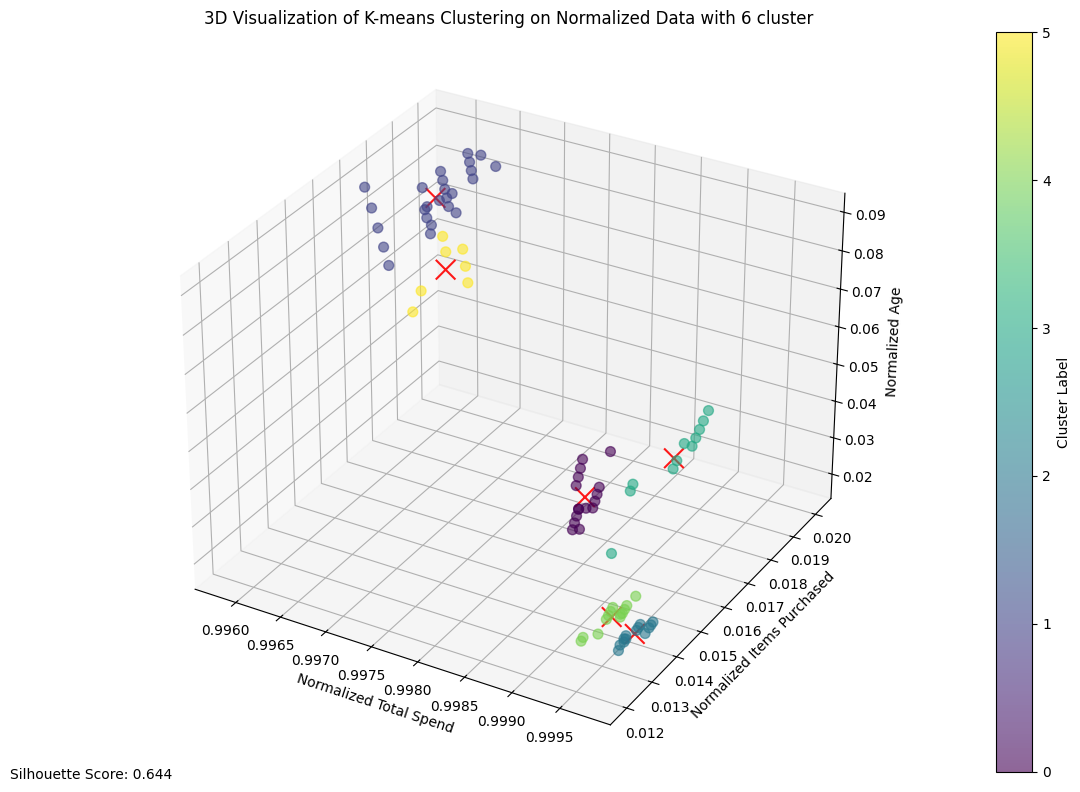

In [92]:
for n in range(2, 7):
    make_model(n)